### Import packages and set config

In [1]:
import os
os.chdir(os.path.dirname(os.path.abspath('..')))

import pandas as pd
import numpy as np

from tqdm.asyncio import tqdm

import umap.umap_ as umap

# For clustering
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from experiments.helpers.scatterplot import scatterplot
from experiments.helpers.silhouette_elbow  import elbowplot, silhouetteplot
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from clusteval import clusteval
from mpl_toolkits.mplot3d import Axes3D

## Clustering analysis

In [2]:
embedding_df = pd.read_csv('/hadatasets/fillipe.silva/LLMSegm/data/olist/gpt2-medium_10_test_embeddings_rfm.csv')

### Determining The Optimal Number Of Clusters

[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were f

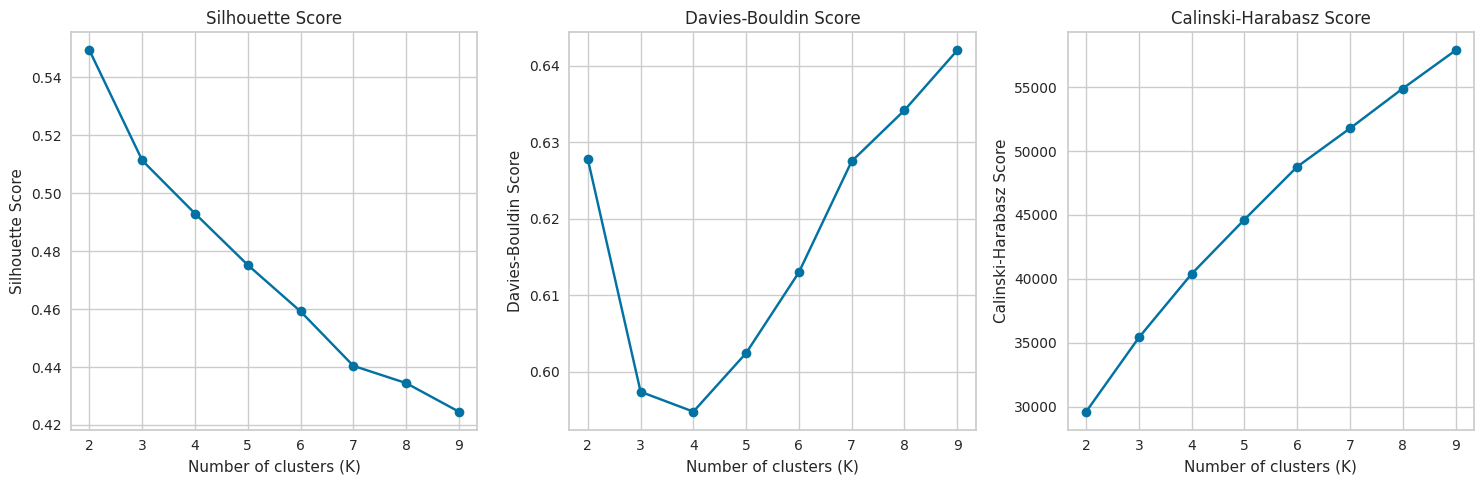

In [3]:
# Generate synthetic data
X = embedding_df

# Range of K to try
K_range = range(2, 10)

# Storage for metric scores
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Calculate metrics for each K
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X, labels))

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(K_range, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Davies-Bouldin Score')

plt.subplot(1, 3, 3)
plt.plot(K_range, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Calinski-Harabasz Score')

plt.tight_layout()
plt.show()

In [4]:
OPTIMAL_CLUSTERS = 2
N_INIT = 10
MAX_ITER = 100

In [ ]:
ce = clusteval(evaluate='silhouette',
               cluster='kmeans',
               min_clust=2,
               verbose='info')
results = ce.fit(embedding_df)

### TSN-e Visualization

In [8]:
tsne = TSNE(n_components=3, verbose=1, perplexity=200, n_iter=5000, learning_rate=200)
X_3d = tsne.fit_transform(embedding_df)

[t-SNE] Computing 601 nearest neighbors...
[t-SNE] Indexed 22514 samples in 11.544s...
[t-SNE] Computed neighbors for 22514 samples in 64.502s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22514
[t-SNE] Computed conditional probabilities for sample 2000 / 22514
[t-SNE] Computed conditional probabilities for sample 3000 / 22514
[t-SNE] Computed conditional probabilities for sample 4000 / 22514
[t-SNE] Computed conditional probabilities for sample 5000 / 22514
[t-SNE] Computed conditional probabilities for sample 6000 / 22514
[t-SNE] Computed conditional probabilities for sample 7000 / 22514
[t-SNE] Computed conditional probabilities for sample 8000 / 22514
[t-SNE] Computed conditional probabilities for sample 9000 / 22514
[t-SNE] Computed conditional probabilities for sample 10000 / 22514
[t-SNE] Computed conditional probabilities for sample 11000 / 22514
[t-SNE] Computed conditional probabilities for sample 12000 / 22514
[t-SNE] Computed conditional probabilities for 

In [9]:
km = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER)
km.fit(X_3d)

KMeans(max_iter=100, n_clusters=2, n_init=10)

[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were f

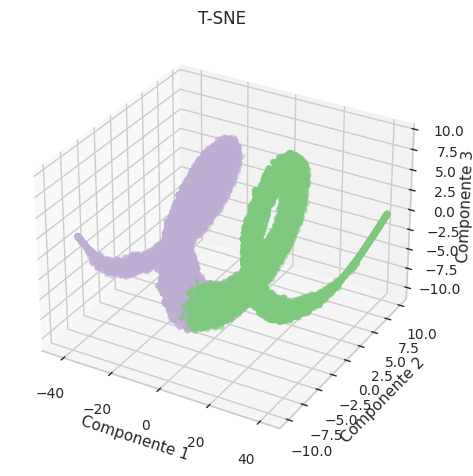

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=plt.cm.Accent(km.labels_), s=20)

ax.set_title('T-SNE')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
plt.show()

### Reducing

In [5]:
reducer = umap.UMAP(n_neighbors=10, n_components=10, metric="cosine", random_state=42)
data_umap = reducer.fit_transform(embedding_df)

/home/fillipe.silva/miniconda3/envs/llmsegm/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


### Metrics

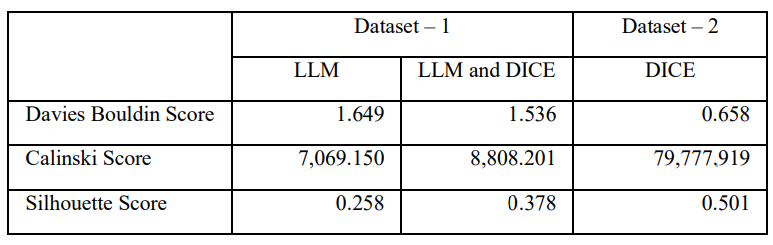

In [9]:
OPTIMAL_CLUSTERS = 2

#The Davies-Bouldin index is a metric for evaluating clustering algorithms where a lower score indicates 
#clusters with high similarity within themselves and low similarity between clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER).fit(embedding_df)
ylabel = kmeans.labels_
print("Davies-Bouldin Index (without umap):", davies_bouldin_score(embedding_df, ylabel))

#The Calinski-Harabasz index, also known as the variance ratio criterion, is a measure of cluster validity, 
#where a higher score indicates better-defined clusters characterized by tight cohesion within clusters and good separation between clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER).fit(embedding_df)
print("Calinski Harabasz Score (without umap):", calinski_harabasz_score(embedding_df, kmeans.labels_))

#The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters, 
#with a higher score indicating a better fit of objects within their own cluster and greater separation from other clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER)
print("Silhouette Score (without umap):", silhouette_score(embedding_df, kmeans.fit_predict(embedding_df)))

Davies-Bouldin Index (without umap): 0.6278913453966979
Calinski Harabasz Score (without umap): 29612.441428454247
Silhouette Score (without umap): 0.5491886219588371


In [7]:
#The Davies-Bouldin index is a metric for evaluating clustering algorithms where a lower score indicates 
#clusters with high similarity within themselves and low similarity between clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=1000).fit(data_umap)
ylabel = kmeans.labels_
dbi = davies_bouldin_score(data_umap, ylabel)
print("Davies-Bouldin Index (with umap):", dbi)

#The Calinski-Harabasz index, also known as the variance ratio criterion, is a measure of cluster validity, 
#where a higher score indicates better-defined clusters characterized by tight cohesion within clusters and good separation between clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER).fit(data_umap)
print("Calinski Harabasz Score (with umap):", calinski_harabasz_score(data_umap, kmeans.labels_))

#The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters, 
#with a higher score indicating a better fit of objects within their own cluster and greater separation from other clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER)
print("Silhouette Score (with umap):", silhouette_score(data_umap, kmeans.fit_predict(data_umap)))

'''
Davies-Bouldin Index (with umap): 1.0978499336637113
Calinski Harabasz Score (with umap): 1386.537068045779
Silhouette Score (with umap): 0.30870458
'''

Davies-Bouldin Index (with umap): 0.9343733900887972
Calinski Harabasz Score (with umap): 19346.86358711524
Silhouette Score (with umap): 0.41456413


'\nDavies-Bouldin Index (with umap): 1.0978499336637113\nCalinski Harabasz Score (with umap): 1386.537068045779\nSilhouette Score (with umap): 0.30870458\n'

### Trying a new way to do embeddings

In [3]:
from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments, Trainer
from datasets import Dataset
import random
import torch

In [4]:
tokenizer_gpt2_medium = AutoTokenizer.from_pretrained("gpt2-medium")
tokenizer_gpt2_medium.pad_token = tokenizer_gpt2_medium.eos_token
model = AutoModelForCausalLM.from_pretrained("gpt2-medium", trust_remote_code=True, torch_dtype="auto")
# Carregar o estado do modelo do arquivo
model.load_state_dict(torch.load("/hadatasets/fillipe.silva/LLMSegm/models/olist/gpt2-medium_10.pt"))
model.eval()

/home/fillipe.silva/miniconda3/envs/llmsegm/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 1024)
    (wpe): Embedding(1024, 1024)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-23): 24 x GPT2Block(
        (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=1024, out_features=50257, bias=False)
)

In [5]:
path_to_test = f"/hadatasets/fillipe.silva/LLMSegm/data/olist/test_rfm.csv"
val_df = pd.read_csv(path_to_test)
columns = val_df.columns.tolist()
ds = Dataset.from_pandas(val_df)

In [6]:
def combine_data_shuffled(sample):
    concat = ""
    for col in random.sample(columns, k=len(columns)):
        concat += "%s is %s, " % (col, str(sample[col]).strip())
    return {"concat": concat}

combined_ds = ds.map(combine_data_shuffled)

Map:   0%|          | 0/18199 [00:00<?, ? examples/s]

In [7]:

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
embeddings = []
for text in tqdm(combined_ds["concat"]):
    token_ids = tokenizer_gpt2_medium.encode(text, add_special_tokens=False)
    
    # Convert token IDs to tensor and move it to the model's device
    tokens_tensor = torch.tensor([token_ids], device=model.device)
    
    with torch.no_grad():
        # Forward pass through the model
        outputs = model(tokens_tensor)
        # Retrieve the hidden states from the model output
        hidden_states = outputs[0]  # 'outputs' is a tuple, the first element is the hidden states

    # Averaging over the sequence length
    embeddings.append(hidden_states[0].mean(dim=0).detach().cpu().numpy())


100%|██████████| 18199/18199 [04:31<00:00, 67.15it/s]


In [8]:
gpt2_medium_nem_embds = pd.DataFrame(embeddings)

[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were f

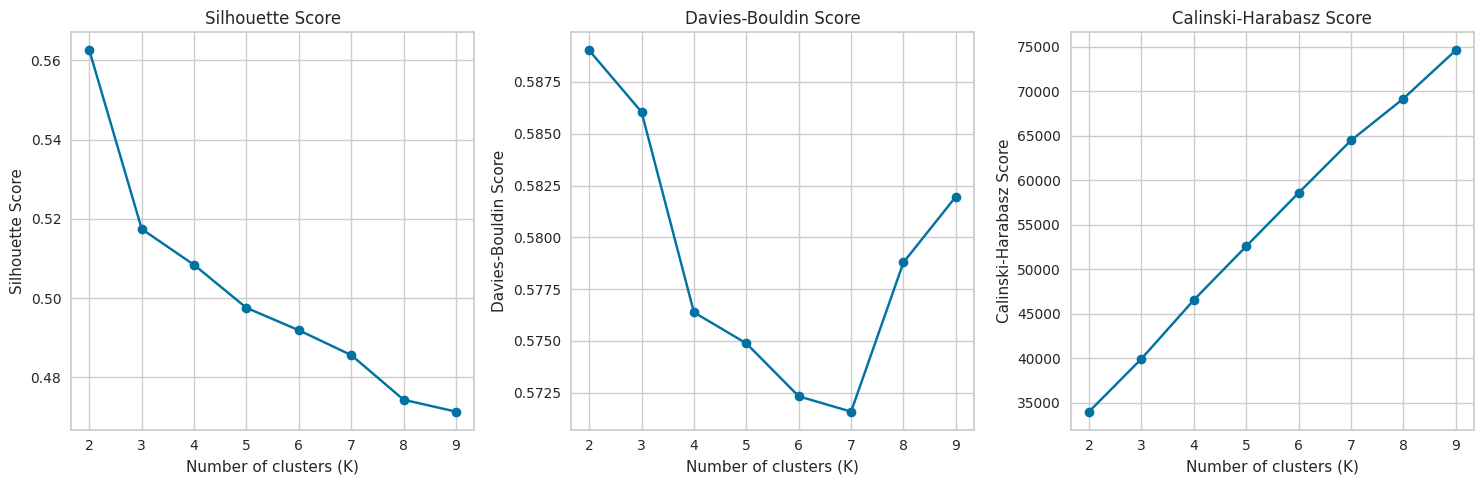

In [9]:
# Generate synthetic data
X = gpt2_medium_nem_embds

# Range of K to try
K_range = range(2, 10)

# Storage for metric scores
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Calculate metrics for each K
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X, labels))

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(K_range, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Davies-Bouldin Score')

plt.subplot(1, 3, 3)
plt.plot(K_range, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Calinski-Harabasz Score')

plt.tight_layout()
plt.show()

In [14]:
from metrics.clustering_metrics import evaluate_clustering_metrics
out = evaluate_clustering_metrics(gpt2_medium_nem_embds, 2)


Number of clusters: 2
Davies-Bouldin Index 0.5890246504494484
Calinski Harabasz Score 33996.90180769955
Silhouette Score 0.5625504851341248


In [16]:
OPTIMAL_CLUSTERS = 2
N_INIT = 10
MAX_ITER = 100

#The Davies-Bouldin index is a metric for evaluating clustering algorithms where a lower score indicates 
#clusters with high similarity within themselves and low similarity between clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER).fit(gpt2_medium_nem_embds)
ylabel = kmeans.labels_
print("Davies-Bouldin Index (without umap):", davies_bouldin_score(gpt2_medium_nem_embds, ylabel))

#The Calinski-Harabasz index, also known as the variance ratio criterion, is a measure of cluster validity, 
#where a higher score indicates better-defined clusters characterized by tight cohesion within clusters and good separation between clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER).fit(gpt2_medium_nem_embds)
print("Calinski Harabasz Score (without umap):", calinski_harabasz_score(gpt2_medium_nem_embds, kmeans.labels_))

#The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters, 
#with a higher score indicating a better fit of objects within their own cluster and greater separation from other clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER)
print("Silhouette Score (without umap):", silhouette_score(gpt2_medium_nem_embds, kmeans.fit_predict(gpt2_medium_nem_embds)))

Davies-Bouldin Index (without umap): 0.5890246504494484
Calinski Harabasz Score (without umap): 33996.90180769955
Silhouette Score (without umap): 0.5625505


In [76]:

import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, init='k-means++', n_init=10, max_iter=300).fit(gpt2_medium_nem_embds)
print("Calinski Harabasz Score (without umap):", calinski_harabasz_score(gpt2_medium_nem_embds, kmeans.labels_))

Calinski Harabasz Score (without umap): 34467.05964974287


### Efficacy Without trainning using Microsoft Phi2

In [15]:
from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments, Trainer
from datasets import Dataset
import random

In [14]:
model_name = "microsoft/phi-2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token
model = AutoModelForCausalLM.from_pretrained(model_name, trust_remote_code=True, torch_dtype="auto")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [16]:
path_to_test = f"/hadatasets/fillipe.silva/LLMSegm/data/olist/test_rfm.csv"
val_df = pd.read_csv(path_to_test)
columns = val_df.columns.tolist()
ds = Dataset.from_pandas(val_df)

In [17]:
def combine_data_shuffled(sample):
    concat = ""
    for col in random.sample(columns, k=len(columns)):
        concat += "%s is %s, " % (col, str(sample[col]).strip())
    return {"concat": concat}

combined_ds = ds.map(combine_data_shuffled)

Map:   0%|          | 0/18199 [00:00<?, ? examples/s]

In [21]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
embs = []
for text in tqdm(combined_ds["concat"]):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True).to(device)
    outputs = model(**inputs)
    logits = outputs.logits
    text_embedding = logits[:, -1, :]
    text_embedding_np = text_embedding.detach().cpu().numpy()
    embs.append(text_embedding_np[0])

100%|██████████| 18199/18199 [08:38<00:00, 35.09it/s]


In [22]:
phi2_embds = pd.DataFrame(embs)

In [24]:
OPTIMAL_CLUSTERS = 2

#The Davies-Bouldin index is a metric for evaluating clustering algorithms where a lower score indicates 
#clusters with high similarity within themselves and low similarity between clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER).fit(phi2_embds)
ylabel = kmeans.labels_
print("Davies-Bouldin Index (without umap):", davies_bouldin_score(phi2_embds, ylabel))

#The Calinski-Harabasz index, also known as the variance ratio criterion, is a measure of cluster validity, 
#where a higher score indicates better-defined clusters characterized by tight cohesion within clusters and good separation between clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER).fit(phi2_embds)
print("Calinski Harabasz Score (without umap):", calinski_harabasz_score(phi2_embds, kmeans.labels_))

#The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters, 
#with a higher score indicating a better fit of objects within their own cluster and greater separation from other clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER)
print("Silhouette Score (without umap):", silhouette_score(phi2_embds, kmeans.fit_predict(phi2_embds)))

Davies-Bouldin Index (without umap): 1.4572710841763656
Calinski Harabasz Score (without umap): 7993.903539335547
Silhouette Score (without umap): 0.30716318


### Efficacy Without trainning using GPT2 medium

In [25]:
model_name = "gpt2-medium"
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token
model = AutoModelForCausalLM.from_pretrained(model_name, trust_remote_code=True, torch_dtype="auto")

/home/fillipe.silva/miniconda3/envs/llmsegm/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [26]:
path_to_test = f"/hadatasets/fillipe.silva/LLMSegm/data/olist/test_rfm.csv"
val_df = pd.read_csv(path_to_test)
columns = val_df.columns.tolist()
ds = Dataset.from_pandas(val_df)

In [27]:
def combine_data_shuffled(sample):
    concat = ""
    for col in random.sample(columns, k=len(columns)):
        concat += "%s is %s, " % (col, str(sample[col]).strip())
    return {"concat": concat}

combined_ds = ds.map(combine_data_shuffled)

Map:   0%|          | 0/18199 [00:00<?, ? examples/s]

In [29]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
embs = []
for text in tqdm(combined_ds["concat"]):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True).to(device)
    outputs = model(**inputs)
    logits = outputs.logits
    text_embedding = logits[:, -1, :]
    text_embedding_np = text_embedding.detach().cpu().numpy()
    embs.append(text_embedding_np[0])

100%|██████████| 18199/18199 [05:46<00:00, 52.56it/s]


In [30]:
gpt2_embds = pd.DataFrame(embs)

In [ ]:
# Generate synthetic data
X = gpt2_embds

# Range of K to try
K_range = range(2, 10)

# Storage for metric scores
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Calculate metrics for each K
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X, labels))

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(K_range, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Davies-Bouldin Score')

plt.subplot(1, 3, 3)
plt.plot(K_range, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Calinski-Harabasz Score')

plt.tight_layout()
plt.show()

In [31]:
OPTIMAL_CLUSTERS = 2

#The Davies-Bouldin index is a metric for evaluating clustering algorithms where a lower score indicates 
#clusters with high similarity within themselves and low similarity between clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER).fit(gpt2_embds)
ylabel = kmeans.labels_
print("Davies-Bouldin Index (without umap):", davies_bouldin_score(gpt2_embds, ylabel))

#The Calinski-Harabasz index, also known as the variance ratio criterion, is a measure of cluster validity, 
#where a higher score indicates better-defined clusters characterized by tight cohesion within clusters and good separation between clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER).fit(gpt2_embds)
print("Calinski Harabasz Score (without umap):", calinski_harabasz_score(gpt2_embds, kmeans.labels_))

#The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters, 
#with a higher score indicating a better fit of objects within their own cluster and greater separation from other clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER)
print("Silhouette Score (without umap):", silhouette_score(gpt2_embds, kmeans.fit_predict(gpt2_embds)))

Davies-Bouldin Index (without umap): 0.6106851807856907
Calinski Harabasz Score (without umap): 34237.38136007763
Silhouette Score (without umap): 0.5517795


### Efficacy Without trainning using GPT2 medium (average embedding layer)

In [33]:
model_name = "gpt2-medium"
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.pad_token = tokenizer.eos_token
model = AutoModelForCausalLM.from_pretrained(model_name, trust_remote_code=True, torch_dtype="auto")

/home/fillipe.silva/miniconda3/envs/llmsegm/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [34]:
path_to_test = f"/hadatasets/fillipe.silva/LLMSegm/data/olist/test_rfm.csv"
val_df = pd.read_csv(path_to_test)
columns = val_df.columns.tolist()
ds = Dataset.from_pandas(val_df)

In [35]:
def combine_data_shuffled(sample):
    concat = ""
    for col in random.sample(columns, k=len(columns)):
        concat += "%s is %s, " % (col, str(sample[col]).strip())
    return {"concat": concat}

combined_ds = ds.map(combine_data_shuffled)

Map:   0%|          | 0/18199 [00:00<?, ? examples/s]

In [36]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
embs = []
for text in tqdm(combined_ds["concat"]):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True).to(device)
    outputs = model(**inputs)
    logits = outputs.logits
    text_embedding = logits[:, -1, :]
    text_embedding_np = text_embedding.detach().cpu().numpy()
    embs.append(text_embedding_np[0])

100%|██████████| 18199/18199 [05:48<00:00, 52.29it/s]


In [37]:
gpt2_new_embds = pd.DataFrame(embs)

[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[clusteval] >WARNING> findfont: Generic family 'sans-serif' not found because none of the following families were f

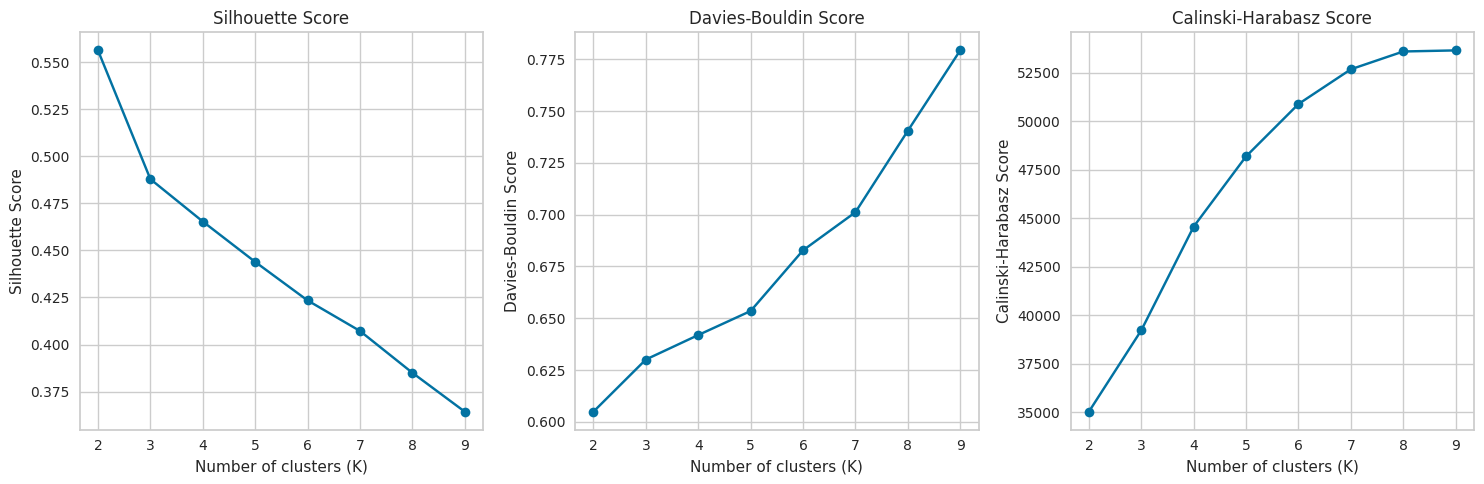

In [40]:
# Generate synthetic data
X = gpt2_new_embds

# Range of K to try
K_range = range(2, 10)

# Storage for metric scores
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Calculate metrics for each K
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(X, labels))

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(K_range, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Davies-Bouldin Score')

plt.subplot(1, 3, 3)
plt.plot(K_range, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Calinski-Harabasz Score')+

plt.tight_layout()
plt.show()

In [39]:
OPTIMAL_CLUSTERS = 2

#The Davies-Bouldin index is a metric for evaluating clustering algorithms where a lower score indicates 
#clusters with high similarity within themselves and low similarity between clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER).fit(gpt2_new_embds)
ylabel = kmeans.labels_
print("Davies-Bouldin Index (without umap):", davies_bouldin_score(gpt2_new_embds, ylabel))

#The Calinski-Harabasz index, also known as the variance ratio criterion, is a measure of cluster validity, 
#where a higher score indicates better-defined clusters characterized by tight cohesion within clusters and good separation between clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER).fit(gpt2_new_embds)
print("Calinski Harabasz Score (without umap):", calinski_harabasz_score(gpt2_new_embds, kmeans.labels_))

#The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters, 
#with a higher score indicating a better fit of objects within their own cluster and greater separation from other clusters.
kmeans = KMeans(n_clusters=OPTIMAL_CLUSTERS, n_init=N_INIT, max_iter=MAX_ITER)
print("Silhouette Score (without umap):", silhouette_score(gpt2_new_embds, kmeans.fit_predict(gpt2_new_embds)))

Davies-Bouldin Index (without umap): 0.6049424327849502
Calinski Harabasz Score (without umap): 35022.3551515109
Silhouette Score (without umap): 0.55630744
